# Sephora Products Review Sentiment Analysis

### Data Setup

In [2]:
# Importing required libraries
import pandas as pd
import glob

In [12]:
file_path = '/Users/yuvrajbains/Desktop/Projects/Sentiment_Analysis_Of_Product_Reviews/data/reviews.csv'

try:
    # Using python engine
    combined_df = pd.read_csv(file_path, sep=',', encoding='utf-8', on_bad_lines='skip', engine='python')
    print(combined_df.head())
except pd.errors.ParserError as e:
    print(f'ParserError: {e}')

  Unnamed: 0    author_id  rating  is_recommended helpfulness  \
0          0   1741593524     5.0             1.0         1.0   
1          1  31423088263     1.0             0.0         NaN   
2          2   5061282401     5.0             1.0         NaN   
3          3   6083038851     5.0             1.0         NaN   
4          4  47056667835     5.0             1.0         NaN   

   total_feedback_count total_neg_feedback_count total_pos_feedback_count  \
0                   2.0                        0                        2   
1                   0.0                        0                        0   
2                   0.0                        0                        0   
3                   0.0                        0                        0   
4                   0.0                        0                        0   

  submission_time                                        review_text  \
0      2023-02-01  I use this with the Nudestix “Citrus Clean Bal...   
1 

### Data Preprocessing

In [13]:
# Selecting relevant columns (Review text and Ratings)
df = combined_df[['review_text', 'rating']].copy()
df

,review_text,rating
0,I use this with the Nudestix “Citrus Clean Bal...,5.0
1,I bought this lip mask after reading the revie...,1.0
2,My review title says it all! I get so excited ...,5.0
3,I’ve always loved this formula for a long time...,5.0
4,"If you have dry cracked lips, this is a must h...",5.0
...,...,...
1095107,Consider salicylic acid your secret weapon for...,5.0
1095108,I’ve been using this as my only moisturizer fo...,5.0
1095109,I got breakouts whenever it’s my time of month...,5.0
1095110,I love this!!! I don’t get actual acne just an...,5.0


In [14]:
# Converting ratings to sentiments
# Rating 1-2 negative
# Rating 3 neutral
# Rating 4-5 positive
df.loc[:, 'Sentiment'] = df['rating'].apply(
    lambda x: 'Negative' if x in [1, 2] else ('Neutral' if x == 3 else 'Positive')
)
df

,review_text,rating,Sentiment
0,I use this with the Nudestix “Citrus Clean Bal...,5.0,Positive
1,I bought this lip mask after reading the revie...,1.0,Negative
2,My review title says it all! I get so excited ...,5.0,Positive
3,I’ve always loved this formula for a long time...,5.0,Positive
4,"If you have dry cracked lips, this is a must h...",5.0,Positive
...,...,...,...
1095107,Consider salicylic acid your secret weapon for...,5.0,Positive
1095108,I’ve been using this as my only moisturizer fo...,5.0,Positive
1095109,I got breakouts whenever it’s my time of month...,5.0,Positive
1095110,I love this!!! I don’t get actual acne just an...,5.0,Positive


In [16]:
# Text cleaning
# Removing special characters etc. 
import re
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_text'] = df['review_text'].apply(preprocess_text)

In [17]:
print(df.head())

                                         review_text  rating Sentiment  \
0  I use this with the Nudestix “Citrus Clean Bal...     5.0  Positive   
1  I bought this lip mask after reading the revie...     1.0  Negative   
2  My review title says it all! I get so excited ...     5.0  Positive   
3  I’ve always loved this formula for a long time...     5.0  Positive   
4  If you have dry cracked lips, this is a must h...     5.0  Positive   

                                        cleaned_text  
0  use nudestix citrus clean balm makeup melt dou...  
1  bought lip mask reading reviews hype unfortuna...  
2  review title says get excited get bed apply li...  
3  ive always loved formula long time honestly do...  
4  dry cracked lips must weeks use learned always...  


### Feature extraction

In [18]:
# Converting cleaned review text into numerical features

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df['cleaned_text']).toarray()
y = df['Sentiment']

### Model Building 

In [19]:
# Split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Using Naive Bayes
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [23]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [24]:
# Evaluating Model
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.84


In [31]:
# Using a Confusion_matric to evaluate the number of correct and incorrrect classifications

from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[ 14515   1548   6972]
 [  3425   3410   9517]
 [  2526   2062 175048]]


In [26]:
# Classification report

from sklearn.metrics import classification_report

# Classification Report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.84      0.19      0.31     23035
     Neutral       0.55      0.01      0.02     16352
    Positive       0.84      1.00      0.91    179636

    accuracy                           0.84    219023
   macro avg       0.75      0.40      0.41    219023
weighted avg       0.82      0.84      0.78    219023



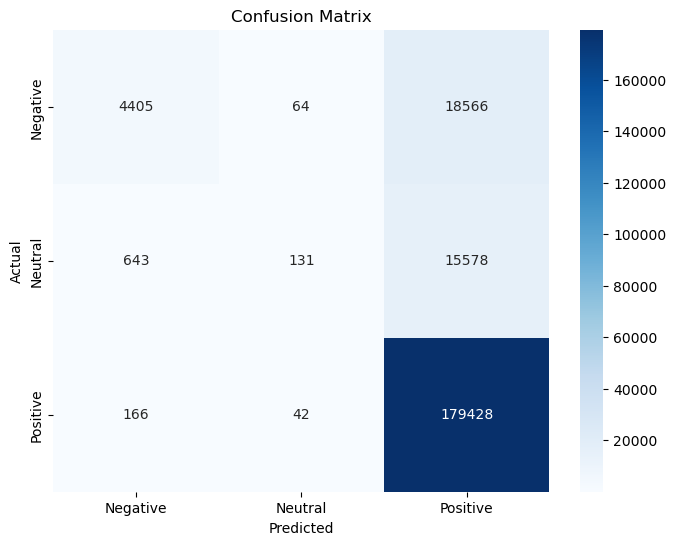

In [27]:
# Visualize the results
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.88
Confusion Matrix:
[[ 14515   1548   6972]
 [  3425   3410   9517]
 [  2526   2062 175048]]
Classification Report:
              precision    recall  f1-score   support

    Negative       0.71      0.63      0.67     23035
     Neutral       0.49      0.21      0.29     16352
    Positive       0.91      0.97      0.94    179636

    accuracy                           0.88    219023
   macro avg       0.70      0.60      0.63    219023
weighted avg       0.86      0.88      0.87    219023



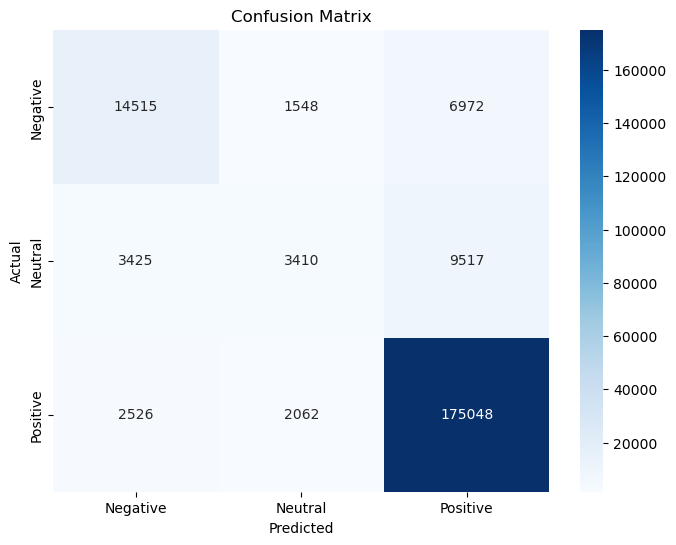

In [28]:
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(max_features=1000)  # Reduce the number of features to speed up
X = tfidf.fit_transform(df['cleaned_text'])  # Use sparse matrix directly
y = df['Sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model with efficient solver
model = LogisticRegression(solver='saga', max_iter=500, n_jobs=-1)  # Use 'saga' solver for faster convergence

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Classification Report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

# Optional: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()